# MGCLASS

**IMPORTANT WARNINGS:**

- MGCLASS modifications work only in newtonian gauge. Remember to set 'gauge': 'newtonian' in your notebooks or parameter fil

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

import classy
from classy import Class



params = {'A_s': 2.215e-9,
          'n_s': 0.9619,
          'h': 0.67556,
          'omega_b': 0.022032,
          'omega_cdm': 0.12038,
          'tau_reio':0.0925,
          'YHe': 0.24,
          'N_eff': 3.046,
          'N_ncdm':1,
          'm_ncdm':0.06,
          'T_cmb':2.7255,
          'gauge':'newtonian', #FOR MGCLASS TO WORK, GAUGE NEEDS TO BE NEWTONIAN
          'k_pivot': 0.05,
          #'mg_z_init': 6.000,
          'l_logstep': 1.025,
          'l_linstep':15,
          'perturb_sampling_stepsize': 0.05,
          'output': 'tCl, lCl, mPk ',
           'l_max_scalars': 3000,
              'lensing': 'yes'}

kappa = np.logspace(np.log10(0.0001),np.log10(1.0),1000)
z     = np.linspace(0,2,100)

#Getting LCDM for reference
cosmo = Class()
cosmo.set(params)
cosmo.compute()
cls = cosmo.lensed_cl(3000)

baLCDM  = cosmo.get_background()
dA_LCDM = interp1d(baLCDM['z'],baLCDM['ang.diam.dist.'],kind='cubic')

TT_LCDM   = cls["tt"]
lens_LCDM = cls["pp"]
ell_LCDM  = cls["ell"]
mPk_LCDM = [cosmo.pk(k,0.) for k in kappa]
norm_LCDM = ell_LCDM*(ell_LCDM+1)/(2*np.pi)
               
#cleanup
cosmo.struct_cleanup()
cosmo.empty()

## Phenomenological parameterizations
MGCLASS implements phenomenological parameterizations.

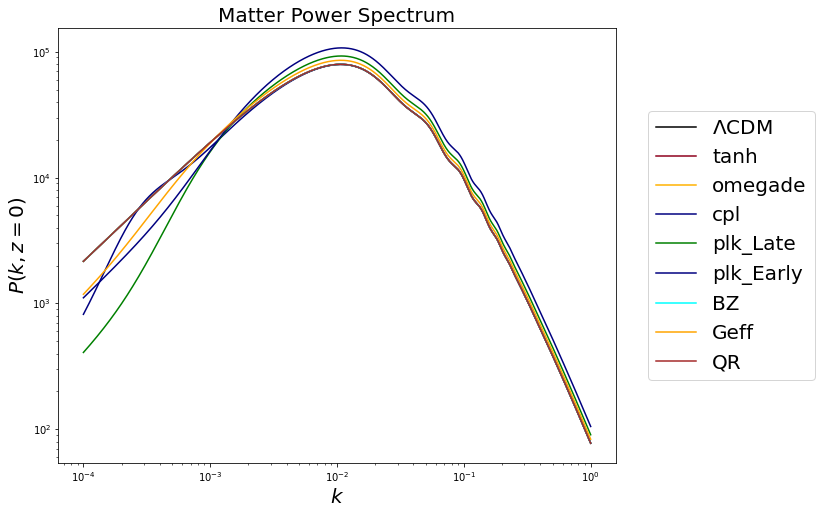

In [2]:
#Examples for simple parameterizations


#####################################tanh parameterization#####################################
params['mg_ansatz'] = 'tanh'
               
               
model_params = {'mg_tanh_Bmu': 0,
                'mg_tanh_Bgam': 0,
                'mg_tanh_Wmu': 1.,
                'mg_tanh_Wgam': 1.}

params.update(model_params)

cosmo = Class()
cosmo.set(params)
cosmo.compute()
cls = cosmo.lensed_cl(3000)
TT_tanh   = cls["tt"]
lens_tanh = cls["pp"]
ell_tanh  = cls["ell"]
norm_tanh = ell_tanh*(ell_tanh+1)/(2*np.pi)
mPk_tanh  = [cosmo.pk(k,0.) for k in kappa]

cosmo.struct_cleanup()
cosmo.empty()
#cleanup
cosmo.struct_cleanup()
cosmo.empty()
for key in model_params:
    if key in params:
        del params[key]
        
#####################################omegade parameterization#####################################
params['mg_ansatz'] = 'omegade'
               
               
model_params = {'mg_lambda': 1,
                'mg_mu_lambda': 0,
                'mg_gam_lambda': 0}

params.update(model_params)

cosmo = Class()
cosmo.set(params)
cosmo.compute()
cls = cosmo.lensed_cl(3000)
TT_omegade   = cls["tt"]
lens_omegade = cls["pp"]
ell_omegade  = cls["ell"]
norm_omegade = ell_omegade*(ell_omegade+1)/(2*np.pi)
mPk_omegade  = [cosmo.pk(k,0.) for k in kappa]

cosmo.struct_cleanup()
cosmo.empty()
#cleanup
cosmo.struct_cleanup()
cosmo.empty()
for key in model_params:
    if key in params:
        del params[key]
        
#####################################cpl parameterization#####################################
params['mg_ansatz'] = 'cpl'
               
               
model_params = {'mg_lambda': 1,
                'mg_mu0': 1,
                'mg_mu1': 0,
                'mg_gam0': 1,
                'mg_gam1': 0}

params.update(model_params)

cosmo = Class()
cosmo.set(params)
cosmo.compute()
cls = cosmo.lensed_cl(3000)
TT_cpl   = cls["tt"]
lens_cpl = cls["pp"]
ell_cpl  = cls["ell"]
norm_cpl = ell_cpl*(ell_cpl+1)/(2*np.pi)
mPk_cpl  = [cosmo.pk(k,0.) for k in kappa]

cosmo.struct_cleanup()
cosmo.empty()
#cleanup
cosmo.struct_cleanup()
cosmo.empty()
for key in model_params:
    if key in params:
        del params[key]
        
#####################################plk_Late parameterization#####################################
params['mg_ansatz'] = 'plk_late'
               
               
model_params = {'mg_E11': 1.,
                'mg_E22': 1.}

params.update(model_params)

cosmo = Class()
cosmo.set(params)
cosmo.compute()
cls = cosmo.lensed_cl(3000)
TT_plk_Late   = cls["tt"]
lens_plk_Late = cls["pp"]
ell_plk_Late  = cls["ell"]
norm_plk_Late = ell_plk_Late*(ell_plk_Late+1)/(2*np.pi)
mPk_plk_Late  = [cosmo.pk(k,0.) for k in kappa]

cosmo.struct_cleanup()
cosmo.empty()
#cleanup
cosmo.struct_cleanup()
cosmo.empty()
for key in model_params:
    if key in params:
        del params[key]
        
#####################################plk_Early parameterization#####################################
params['mg_ansatz'] = 'plk_early'
               
               
model_params = {'mg_E11': 1.,
                'mg_E22': 1.,
                'mg_c1': 1,
                'mg_c2': 1,}

params.update(model_params)

cosmo = Class()
cosmo.set(params)
cosmo.compute()
cls = cosmo.lensed_cl(3000)
TT_plk_Early   = cls["tt"]
lens_plk_Early = cls["pp"]
ell_plk_Early  = cls["ell"]
norm_plk_Early = ell_plk_Early*(ell_plk_Early+1)/(2*np.pi)
mPk_plk_Early  = [cosmo.pk(k,0.) for k in kappa]

cosmo.struct_cleanup()
cosmo.empty()
#cleanup
cosmo.struct_cleanup()
cosmo.empty()
for key in model_params:
    if key in params:
        del params[key]
        

#####################################BZ parameterization#####################################
params['mg_ansatz'] = 'BZ'
               
               
model_params = {'mg_B1': 1,
                'mg_B2': 1,
                'mg_lambda1_2': 0,
                'mg_lambda2_2': 1,
                'mg_ss': 0}

params.update(model_params)

cosmo = Class()
cosmo.set(params)
cosmo.compute()
cls = cosmo.lensed_cl(3000)
TT_BZ   = cls["tt"]
lens_BZ = cls["pp"]
ell_BZ  = cls["ell"]
norm_BZ = ell_BZ*(ell_BZ+1)/(2*np.pi)
mPk_BZ  = [cosmo.pk(k,0.) for k in kappa]

cosmo.struct_cleanup()
cosmo.empty()
#cleanup
cosmo.struct_cleanup()
cosmo.empty()
for key in model_params:
    if key in params:
        del params[key]
        
#####################################Geff parameterization#####################################
params['mg_ansatz'] = 'Geff'
               
               
model_params = {'mg_ga': 1,
                'mg_gn': 1}

params.update(model_params)

cosmo = Class()
cosmo.set(params)
cosmo.compute()
cls = cosmo.lensed_cl(3000)
TT_Geff   = cls["tt"]
lens_Geff = cls["pp"]
ell_Geff  = cls["ell"]
norm_Geff = ell_Geff*(ell_Geff+1)/(2*np.pi)
mPk_Geff  = [cosmo.pk(k,0.) for k in kappa]

cosmo.struct_cleanup()
cosmo.empty()
#cleanup
cosmo.struct_cleanup()
cosmo.empty()
for key in model_params:
    if key in params:
        del params[key]
        

#####################################QR parameterization#####################################
params['mg_ansatz'] = 'QR'
               
               
model_params = {'mg_Q': 1,
                'mg_R': 1,
                'mg_QRss': 0}

params.update(model_params)

cosmo = Class()
cosmo.set(params)
cosmo.compute()
cls = cosmo.lensed_cl(3000)
TT_QR   = cls["tt"]
lens_QR = cls["pp"]
ell_QR  = cls["ell"]
norm_QR = ell_QR*(ell_QR+1)/(2*np.pi)
mPk_QR  = [cosmo.pk(k,0.) for k in kappa]

cosmo.struct_cleanup()
cosmo.empty()
#cleanup
cosmo.struct_cleanup()
cosmo.empty()
for key in model_params:
    if key in params:
        del params[key]
        
        
        
plt.figure(figsize=(10, 8))
plt.title('Temperature',fontsize=20)
plt.plot(ell_LCDM,TT_LCDM*norm_LCDM,label=r'$\Lambda$CDM',ls='-',color='black')
plt.plot(ell_tanh,TT_tanh*norm_tanh,label='tanh',ls='-',color='#8E001C')
plt.plot(ell_omegade,TT_omegade*norm_omegade,label='omegade',ls='-',color='#FFB300')
plt.plot(ell_cpl,TT_cpl*norm_cpl,label='cpl',ls='-',color='navy')
plt.plot(ell_plk_Late,TT_plk_Late*norm_plk_Late,label='plk_Late',ls='-',color='green')
plt.plot(ell_plk_Early,TT_plk_Early*norm_plk_Early,label='plk_Early',ls='-',color='navy')
plt.plot(ell_BZ,TT_BZ*norm_BZ,label='BZ',ls='-',color='cyan')
plt.plot(ell_Geff,TT_Geff*norm_Geff,label='Geff',ls='-',color='orange')
plt.plot(ell_QR,TT_QR*norm_QR,label='QR',ls='-',color='brown')
plt.xlabel(r'$\ell$',fontsize=20)
plt.ylabel(r'$D_{\ell}^{TT}$',fontsize=20)
plt.xlim(2.0,2000)
plt.xscale('log')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left",fontsize=20)
plt.show()

plt.figure(figsize=(10, 8))
plt.title('Matter Power Spectrum',fontsize=20)
plt.plot(kappa,mPk_LCDM,label=r'$\Lambda$CDM',ls='-',color='black')
plt.plot(kappa,mPk_tanh,label='tanh',ls='-',color='#8E001C')
plt.plot(kappa,mPk_omegade,label='omegade',ls='-',color='#FFB300')
plt.plot(kappa,mPk_cpl,label='cpl',ls='-',color='navy')
plt.plot(kappa,mPk_plk_Late,label='plk_Late',ls='-',color='green')
plt.plot(kappa,mPk_plk_Early,label='plk_Early',ls='-',color='navy')
plt.plot(kappa,mPk_BZ,label='BZ',ls='-',color='cyan')
plt.plot(kappa,mPk_Geff,label='Geff',ls='-',color='orange')
plt.plot(kappa,mPk_QR,label='QR',ls='-',color='brown')
plt.xlabel(r'$k$',fontsize=20)
plt.ylabel(r'$P(k,z=0)$',fontsize=20)
plt.xscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left",fontsize=20)
plt.show()

### Reproducing Fig.1 of [Planck 2015 results. XIV](https://arxiv.org/abs/1502.01590)

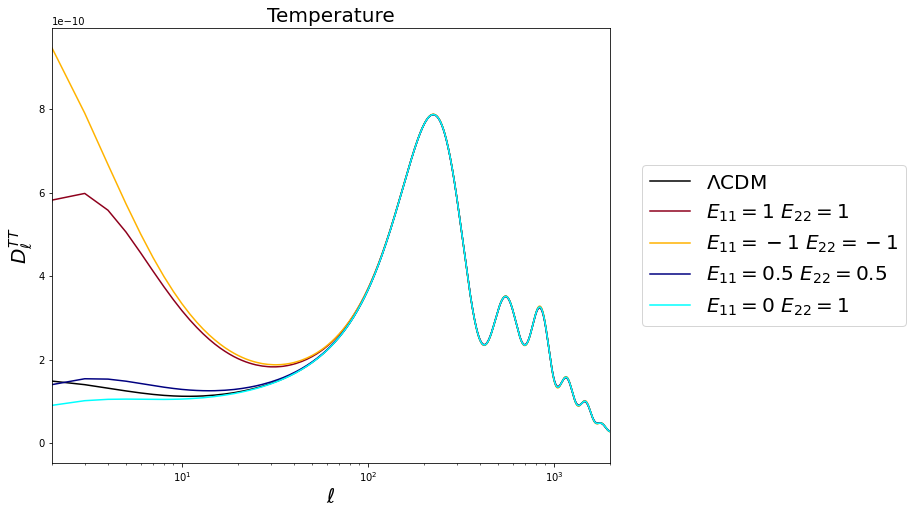

In [5]:
#Reproducing Fig.1 of https://arxiv.org/abs/1502.01590

params['mg_ansatz'] = 'plk_late'

E11    = [1.,-1.,0.5,0.]
E22    = [1.,-1.,0.5,1.]
labels = [r'$E_{11}=1$ $E_{22}=1$',r'$E_{11}=-1$ $E_{22}=-1$',
          r'$E_{11}=0.5$ $E_{22}=0.5$',r'$E_{11}=0$ $E_{22}=1$']
colors = ['#8E001C','#FFB300','navy','cyan']


ell = []
cls_lens = []
cls_tt = []



for par1,par2 in zip(E11,E22):
    params['mg_E11'] = par1
    params['mg_E22'] = par2
    
    cosmo = Class()
    cosmo.set(params)
    cosmo.compute()
    cls = cosmo.lensed_cl(3000)
    cls_tt.append(cls["tt"])
    cls_lens.append(cls["pp"])
    ell.append(cls["ell"])
    params.pop('mg_E11')
    params.pop('mg_E22')
    cosmo.struct_cleanup()
    cosmo.empty()
    



    
plt.figure(figsize=(10, 8))
plt.title('Temperature',fontsize=20)
plt.plot(ell_LCDM,TT_LCDM*norm_LCDM,label=r'$\Lambda$CDM',ls='-',color='black')
for ind in range(len(E11)):
    plt.plot(ell[ind],cls_tt[ind]*ell[ind]*(ell[ind]+1)/(2*np.pi),label=labels[ind],ls='-',color=colors[ind])
plt.xlabel(r'$\ell$',fontsize=20)
plt.ylabel(r'$D_{\ell}^{TT}$',fontsize=20)
plt.xlim(2.0,2000)
plt.xscale('log')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left",fontsize=20)
plt.show()


plt.figure(figsize=(10, 8))
plt.title('Lensing potential',fontsize=20)
plt.plot(ell_LCDM,lens_LCDM*norm_LCDM**2.*(2*np.pi),label=r'$\Lambda$CDM',ls='-',color='black')
for ind in range(len(E11)):
    plt.plot(ell[ind],cls_lens[ind]*(ell[ind]*(ell[ind]+1))**2./(2*np.pi),label=labels[ind],ls='-',color=colors[ind])
plt.xlabel(r'$\ell$',fontsize=20)
plt.ylabel(r'$D_{\ell}^{\phi\phi}$',fontsize=20)
plt.xlim(2.0,3000)
plt.xscale('log')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left",fontsize=20)
plt.show()


## EFT based parameterizations
MGCLASS implements parameterizations based on the EFT approach.

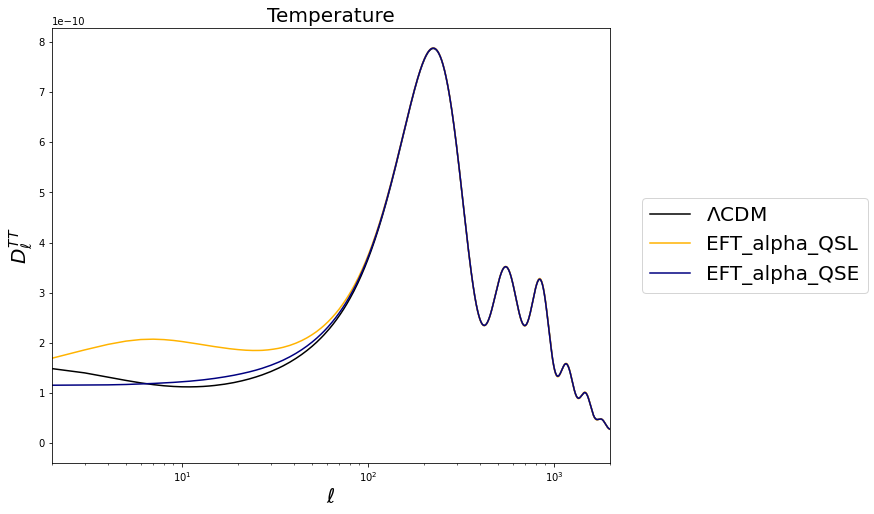

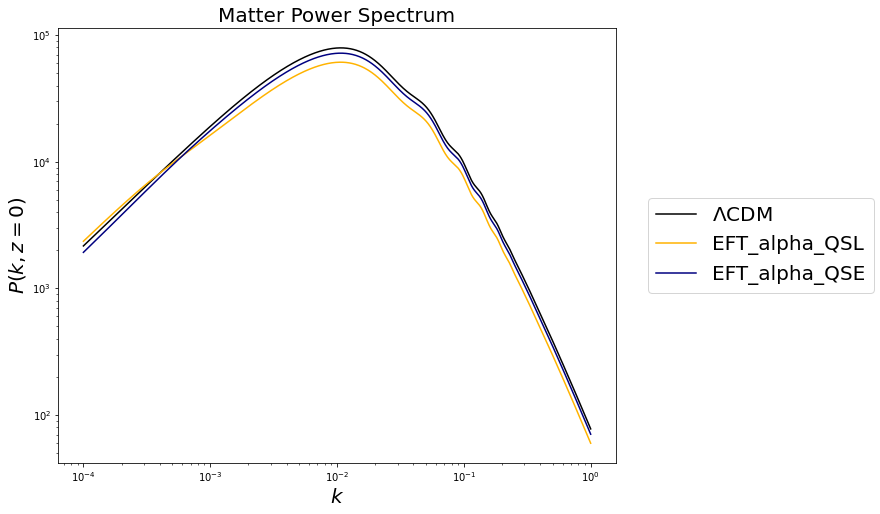

In [4]:
#Examples for EFT based parameterizations


        
        
#####################################EFT_alpha_QSL#####################################
params['mg_ansatz'] = 'EFT_alpha_QSL'
               
               
model_params = {'mg_EFT_alpha_M': 0.2, 
                'mg_EFT_alpha_b': 0.1}

params.update(model_params)

cosmo = Class()
cosmo.set(params)
cosmo.compute()
cls = cosmo.lensed_cl(3000)
TT_EFT_alpha_QSL   = cls["tt"]
lens_EFT_alpha_QSL = cls["pp"]
ell_EFT_alpha_QSL  = cls["ell"]
norm_EFT_alpha_QSL = ell_EFT_alpha_QSL*(ell_EFT_alpha_QSL+1)/(2*np.pi)
mPk_EFT_alpha_QSL  = [cosmo.pk(k,0.) for k in kappa]

cosmo.struct_cleanup()
cosmo.empty()
#cleanup
cosmo.struct_cleanup()
cosmo.empty()
for key in model_params:
    if key in params:
        del params[key]

#####################################EFT_alpha_QSE#####################################
params['mg_ansatz'] = 'EFT_alpha_QSE'
               
               
model_params = {'mg_EFT_alpha_M': 0.2, 
                 'mg_EFT_alpha_b': - 0.3}

params.update(model_params)

cosmo = Class()
cosmo.set(params)
cosmo.compute()
cls = cosmo.lensed_cl(3000)
TT_EFT_alpha_QSE   = cls["tt"]
lens_EFT_alpha_QSE = cls["pp"]
ell_EFT_alpha_QSE  = cls["ell"]
norm_EFT_alpha_QSE = ell_EFT_alpha_QSE*(ell_EFT_alpha_QSE+1)/(2*np.pi)
mPk_EFT_alpha_QSE  = [cosmo.pk(k,0.) for k in kappa]

cosmo.struct_cleanup()
cosmo.empty()
#cleanup
cosmo.struct_cleanup()
cosmo.empty()
for key in model_params:
     if key in params:
        del params[key]
        
plt.figure(figsize=(10, 8))
plt.title('Temperature',fontsize=20)
plt.plot(ell_LCDM,TT_LCDM*norm_LCDM,label=r'$\Lambda$CDM',ls='-',color='black')
plt.plot(ell_EFT_alpha_QSL,TT_EFT_alpha_QSL*norm_EFT_alpha_QSL,label='EFT_alpha_QSL',ls='-',color='#FFB300')
plt.plot(ell_EFT_alpha_QSE,TT_EFT_alpha_QSE*norm_EFT_alpha_QSE,label='EFT_alpha_QSE',ls='-',color='navy')
plt.xlabel(r'$\ell$',fontsize=20)
plt.ylabel(r'$D_{\ell}^{TT}$',fontsize=20)
plt.xlim(2.0,2000)
plt.xscale('log')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left",fontsize=20)
plt.show()

plt.figure(figsize=(10, 8))
plt.title('Matter Power Spectrum',fontsize=20)
plt.plot(kappa,mPk_LCDM,label=r'$\Lambda$CDM',ls='-',color='black')
plt.plot(kappa,mPk_EFT_alpha_QSL,label='EFT_alpha_QSL',ls='-',color='#FFB300')
plt.plot(kappa,mPk_EFT_alpha_QSE,label='EFT_alpha_QSE',ls='-',color='navy')
plt.xlabel(r'$k$',fontsize=20)
plt.ylabel(r'$P(k,z=0)$',fontsize=20)
plt.xscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left",fontsize=20)
plt.show()

## Specific models

MGCLASS also implements a few specific models

- **FR**, $f(R)$ model 

- **Dil**, $dilaton$ model 

- **Sym**, $symmetron$ model 

- **JBD** 

- **nDGP** 

- **kmoufl** 

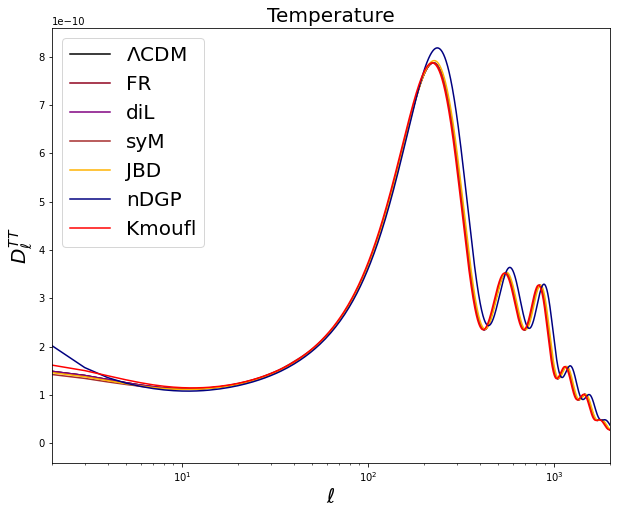

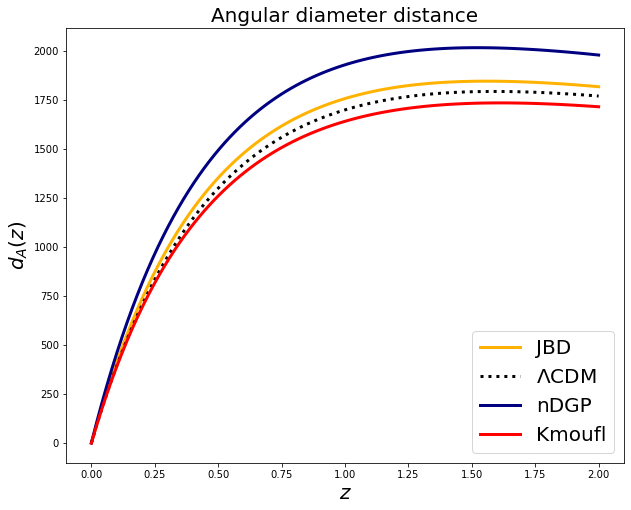

In [5]:
#Specific models

#####################################FR#####################################
params['mg_ansatz'] = 'FR'
               
               
model_params = {'F_R0': 1.e-5, 
                'FRn': 1}

params.update(model_params)

cosmo = Class()
cosmo.set(params)
cosmo.compute()
cls = cosmo.lensed_cl(3000)
TT_FR   = cls["tt"]
lens_FR = cls["pp"]
ell_FR  = cls["ell"]
norm_FR = ell_FR*(ell_FR+1)/(2*np.pi)
mPk_FR  = [cosmo.pk(k,0.) for k in kappa]

cosmo.struct_cleanup()
cosmo.empty()
#cleanup
cosmo.struct_cleanup()
cosmo.empty()
for key in model_params:
    if key in params:
        del params[key]
#####################################FR#####################################
params['mg_ansatz'] = 'diL'
               
               
model_params = {'beta0' : 1.0, 'xi0' : 0.0001, 'DilS' : 0.24, 'DilR' : 1.0}

params.update(model_params)

cosmo = Class()
cosmo.set(params)
cosmo.compute()
cls = cosmo.lensed_cl(3000)
TT_DIL   = cls["tt"]
lens_DIL = cls["pp"]
ell_DIL  = cls["ell"]
norm_DIL = ell_DIL*(ell_DIL+1)/(2*np.pi)
mPk_DIL  = [cosmo.pk(k,0.) for k in kappa]

cosmo.struct_cleanup()
cosmo.empty()
#cleanup
cosmo.struct_cleanup()
cosmo.empty()
for key in model_params:
    if key in params:
        del params[key]
        
#####################################FR#####################################
params['mg_ansatz'] = 'syM'
               
               
model_params = {'beta_star' : 1.0, 'a_star' : 0.8, 'xi_star' : 0.01}

params.update(model_params)

cosmo = Class()
cosmo.set(params)
cosmo.compute()
cls = cosmo.lensed_cl(3000)
TT_SYM   = cls["tt"]
lens_SYM = cls["pp"]
ell_SYM  = cls["ell"]
norm_SYM = ell_SYM*(ell_SYM+1)/(2*np.pi)
mPk_SYM  = [cosmo.pk(k,0.) for k in kappa]

cosmo.struct_cleanup()
cosmo.empty()
#cleanup
cosmo.struct_cleanup()
cosmo.empty()
for key in model_params:
    if key in params:
        del params[key]        

#####################################JBD#####################################
params['mg_ansatz'] = 'JBD'
               
               
model_params = {'w_JBD': 75, 'mg_z_init' : 3.0001, 'h' : 0.64966447,  
                'omega_cdm' : 0.119, 'Omega_Lambda' : 0.671942081
               }


params.update(model_params)

cosmo = Class()
cosmo.set(params)
cosmo.compute()
cls = cosmo.lensed_cl(3000)
TT_JBD   = cls["tt"]
lens_JBD = cls["pp"]
ell_JBD  = cls["ell"]
norm_JBD = ell_JBD*(ell_JBD+1)/(2*np.pi)
mPk_JBD  = [cosmo.pk(k,0.) for k in kappa]

bamod  = cosmo.get_background()
dA_JBD = interp1d(bamod['z'],bamod['ang.diam.dist.'],kind='cubic')


#cleanup
cosmo.struct_cleanup()
cosmo.empty()
for key in model_params:
    if key in params:
        del params[key]

#####################################nDGP#####################################
params['mg_ansatz'] = 'nDGP'
               
               
model_params = {'rc': 20000, 'h' : 0.64996, 'Omega_Lambda' : 1.5, 'mg_z_init' : 6.0001}

params.update(model_params)

cosmo = Class()
cosmo.set(params)
cosmo.compute()
cls = cosmo.lensed_cl(3000)
TT_nDGP   = cls["tt"]
lens_nDGP = cls["pp"]
ell_nDGP  = cls["ell"]
norm_nDGP = ell_nDGP*(ell_nDGP+1)/(2*np.pi)
mPk_nDGP  = [cosmo.pk(k,0.) for k in kappa]

bamod  = cosmo.get_background()
dA_nDGP = interp1d(bamod['z'],bamod['ang.diam.dist.'],kind='cubic')
#cleanup
cosmo.struct_cleanup()
cosmo.empty()
for key in model_params:
    if key in params:
        del params[key]

        
 #####################################kmoufl#####################################  

params['mg_ansatz'] = 'kmoufl'
               
               
model_params = {'beta_kmfl': 0.05, 'k0_kmfl' : 0.1, 'mg_z_init' : 6.0001}

params.update(model_params)

cosmo = Class()
cosmo.set(params)
cosmo.compute()
cls = cosmo.lensed_cl(3000)
TT_kmfl   = cls["tt"]
lens_kmfl = cls["pp"]
ell_kmfl  = cls["ell"]
norm_kmfl = ell_kmfl*(ell_kmfl+1)/(2*np.pi)
mPk_kmfl  = [cosmo.pk(k,0.) for k in kappa]

bamod  = cosmo.get_background()
dA_kmfl = interp1d(bamod['z'],bamod['ang.diam.dist.'],kind='cubic')
#cleanup
cosmo.struct_cleanup()
cosmo.empty()
for key in model_params:
    if key in params:
        del params[key]

plt.figure(figsize=(10, 8))
plt.title('Temperature',fontsize=20)
plt.plot(ell_LCDM,TT_LCDM*norm_LCDM,label=r'$\Lambda$CDM',ls='-',color='black')
plt.plot(ell_FR,TT_FR*norm_FR,label='FR',ls='-',color='#8E001C')
plt.plot(ell_DIL,TT_DIL*norm_DIL,label='diL',ls='-',color='purple')
plt.plot(ell_SYM,TT_SYM*norm_SYM,label='syM',ls='-',color='brown')
plt.plot(ell_JBD,TT_JBD*norm_JBD,label='JBD',ls='-',color='#FFB300')
plt.plot(ell_nDGP,TT_nDGP*norm_nDGP,label='nDGP',ls='-',color='navy')
plt.plot(ell_kmfl,TT_kmfl*norm_kmfl,label='Kmoufl',ls='-',color='red')                  
plt.xlabel(r'$\ell$',fontsize=20)
plt.ylabel(r'$D_{\ell}^{TT}$',fontsize=20)
plt.xlim(2.0,2000)
plt.xscale('log')
plt.legend(loc="upper left",fontsize=20)
plt.show()

plt.figure(figsize=(10, 8))
plt.title('Matter Power Spectrum',fontsize=20)
plt.plot(kappa,mPk_LCDM,label=r'$\Lambda$CDM',ls='-',color='black')
plt.plot(kappa,mPk_FR,label='FR',ls='-',color='#8E001C')
plt.plot(kappa,mPk_DIL,label='diL',ls='-',color='purple')
plt.plot(kappa,mPk_SYM,label='syM',ls='-',color='brown')
plt.plot(kappa,mPk_JBD,label='JBD',ls='-',color='#FFB300')
plt.plot(kappa,mPk_nDGP,label='nDGP',ls='-',color='navy')
plt.plot(kappa,mPk_kmfl,label='Kmoufl',ls='-',color='red')                  
plt.xlim(1e-4,10.0)
plt.xlabel(r'$k$',fontsize=20)
plt.ylabel(r'$P(k,z=0)$',fontsize=20)
plt.xscale('log')
plt.yscale('log')
plt.legend( loc="lower left",fontsize=20)
plt.show()

plt.figure(figsize=(10, 8))
plt.title('Angular diameter distance',fontsize=20)
plt.plot(z,dA_JBD(z),label=r'JBD',ls='-',lw=3,zorder=0,color='#FFB300')
plt.plot(z,dA_LCDM(z),label=r'$\Lambda$CDM',ls=':',lw=3,zorder=10,color='black')
plt.plot(z,dA_nDGP(z),label=r'nDGP',ls='-',lw=3,zorder=10,color='navy')
plt.plot(z,dA_kmfl(z),label=r'Kmoufl',ls='-',lw=3,zorder=10,color='red')                  
plt.xlabel(r'$z$',fontsize=20)
plt.ylabel(r'$d_A(z)$',fontsize=20)
plt.legend(loc="lower right",fontsize=20)
plt.show()

## Additional options 

MGCLASS also contains some options affecting all (or most) of the parameterizations and models implemented

- **mg_z_init**, the initial redshift at which modifications are turned on. Setting this to $z=0$ would recover $\Lambda$CDM

- **mg_no_lens**, a simple switch: setting it to 0 does not affect the code, while setting it to 1 forces the models considered to not modify the Weyl potential, i.e. $\Sigma(z,k)=1$ 

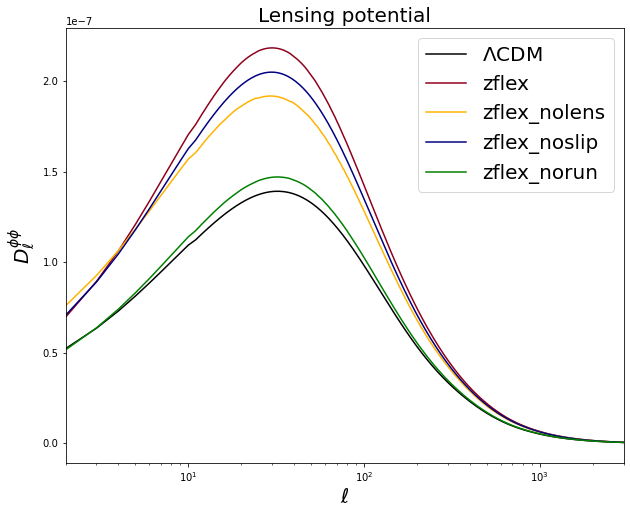

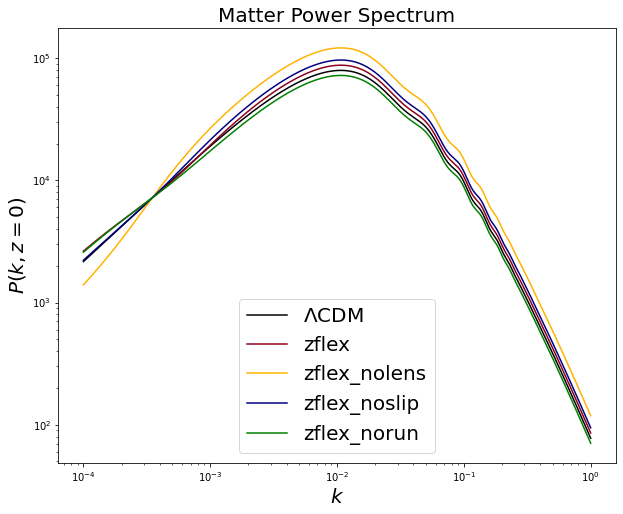

In [15]:
#Examples for options to be done here

#general case

params['mg_ansatz'] = 'z_flex_early'
               
               
model_params = {'h' : 0.67556,'mg_muz': 1.0, 'mg_gamz' : 1.0, 'mg_zzn' : 1.0}

params.update(model_params)

cosmo = Class()
cosmo.set(params)
cosmo.compute()
cls = cosmo.lensed_cl(3000)
TT_zflex   = cls["tt"]
lens_zflex = cls["pp"]
ell_zflex  = cls["ell"]
norm_zflex = ell_zflex*(ell_zflex+1)/(2*np.pi)
lens_norm_zflex = (ell_zflex*(ell_zflex+1))**2.0/(2*np.pi)
mPk_zflex  = [cosmo.pk(k,0.) for k in kappa]

bamod  = cosmo.get_background()
dA_zflex = interp1d(bamod['z'],bamod['ang.diam.dist.'],kind='cubic')

#cleanup
cosmo.struct_cleanup()
cosmo.empty()
for key in model_params:
    if key in params:
        del params[key]
        
#no_lens case        
        
params['mg_ansatz'] = 'z_flex_early'
               
               
model_params = {'mg_muz': 1.0, 'mg_zzn' : 1.0, 'mg_no_lens' : 'yes'}

params.update(model_params)

cosmo = Class()
cosmo.set(params)
cosmo.compute()
cls = cosmo.lensed_cl(3000)
TT_zflex_nol   = cls["tt"]
lens_zflex_nol = cls["pp"]
ell_zflex_nol  = cls["ell"]
norm_zflex_nol = ell_zflex_nol*(ell_zflex_nol+1)/(2*np.pi)
lens_norm_zflex_nol = (ell_zflex_nol*(ell_zflex_nol+1))**2.0/(2*np.pi)
mPk_zflex_nol  = [cosmo.pk(k,0.) for k in kappa]

bamod  = cosmo.get_background()
dA_zflex_nol = interp1d(bamod['z'],bamod['ang.diam.dist.'],kind='cubic')

#cleanup
cosmo.struct_cleanup()
cosmo.empty()
for key in model_params:
    if key in params:
        del params[key] 
    
#no slip case

params['mg_ansatz'] = 'z_flex_early'
               
               
model_params = {'h' : 0.67556,'mg_muz': 1.0, 'mg_gamz' : 0.0, 'mg_zzn' : 1.0}

params.update(model_params)

cosmo = Class()
cosmo.set(params)
cosmo.compute()
cls = cosmo.lensed_cl(3000)
TT_zflex_nosl   = cls["tt"]
lens_zflex_nosl = cls["pp"]
ell_zflex_nosl  = cls["ell"]
norm_zflex_nosl = ell_zflex_nosl*(ell_zflex_nosl+1)/(2*np.pi)
lens_norm_zflex_nosl = (ell_zflex_nosl*(ell_zflex_nosl+1))**2.0/(2*np.pi)
mPk_zflex_nosl  = [cosmo.pk(k,0.) for k in kappa]

bamod  = cosmo.get_background()
dA_zflex_nosl = interp1d(bamod['z'],bamod['ang.diam.dist.'],kind='cubic')

#cleanup
cosmo.struct_cleanup()
cosmo.empty()
for key in model_params:
    if key in params:
        del params[key] 
        
#no run case

params['mg_ansatz'] = 'z_flex_early'
               
               
model_params = {'h' : 0.67556,'mg_muz': 0.0, 'mg_gamz' : 1.0, 'mg_zzn' : 1.0}

params.update(model_params)

cosmo = Class()
cosmo.set(params)
cosmo.compute()
cls = cosmo.lensed_cl(3000)
TT_zflex_nor   = cls["tt"]
lens_zflex_nor = cls["pp"]
ell_zflex_nor  = cls["ell"]
norm_zflex_nor = ell_zflex_nor*(ell_zflex_nor+1)/(2*np.pi)
lens_norm_zflex_nor = (ell_zflex_nor*(ell_zflex_nor+1))**2.0/(2*np.pi)
mPk_zflex_nor  = [cosmo.pk(k,0.) for k in kappa]

bamod  = cosmo.get_background()
dA_zflex_nor = interp1d(bamod['z'],bamod['ang.diam.dist.'],kind='cubic')
#cleanup
cosmo.struct_cleanup()
cosmo.empty()
for key in model_params:
    if key in params:
        del params[key]         

plt.figure(figsize=(10, 8))
plt.title('Temperature',fontsize=20)
plt.plot(ell_LCDM,TT_LCDM*norm_LCDM,label=r'$\Lambda$CDM',ls='-',color='black')
plt.plot(ell_zflex,TT_zflex*norm_zflex,label='zflex',ls='-',color='#8E001C')
plt.plot(ell_zflex_nol,TT_zflex_nol*norm_zflex_nol,label='zflex_nolens',ls='-',color='#FFB300')
plt.plot(ell_zflex_nosl,TT_zflex_nosl*norm_zflex_nosl,label='zflex_noslip',ls='-',color='navy')
plt.plot(ell_zflex_nor,TT_zflex_nor*norm_zflex_nor,label='zflex_norun',ls='-',color='green')
plt.xlabel(r'$\ell$',fontsize=20)
plt.ylabel(r'$D_{\ell}^{TT}$',fontsize=20)
plt.xlim(2.0,2000)
plt.xscale('log')
plt.legend(loc="upper left",fontsize=20)
plt.show()

plt.figure(figsize=(10, 8))
plt.title('Lensing potential',fontsize=20)
plt.plot(ell_LCDM,lens_LCDM*lens_norm_zflex,label=r'$\Lambda$CDM',ls='-',color='black')
plt.plot(ell_zflex,lens_zflex*lens_norm_zflex,label='zflex',ls='-',color='#8E001C')
plt.plot(ell_zflex_nol,lens_zflex_nol*lens_norm_zflex_nol,label='zflex_nolens',ls='-',color='#FFB300')
plt.plot(ell_zflex_nosl,lens_zflex_nosl*lens_norm_zflex_nosl,label='zflex_noslip',ls='-',color='navy')
plt.plot(ell_zflex_nor,lens_zflex_nor*lens_norm_zflex_nor,label='zflex_norun',ls='-',color='green')
plt.xlabel(r'$\ell$',fontsize=20)
plt.ylabel(r'$D_{\ell}^{\phi\phi}$',fontsize=20)
plt.xlim(2.0,3000)
plt.xscale('log')
plt.legend(loc="upper right",fontsize=20)
plt.show()

plt.figure(figsize=(10, 8))
plt.title('Matter Power Spectrum',fontsize=20)
plt.plot(kappa,mPk_LCDM,label=r'$\Lambda$CDM',ls='-',color='black')
plt.plot(kappa,mPk_zflex,label='zflex',ls='-',color='#8E001C')
plt.plot(kappa,mPk_zflex_nol,label='zflex_nolens',ls='-',color='#FFB300')
plt.plot(kappa,mPk_zflex_nosl,label='zflex_noslip',ls='-',color='navy')
plt.plot(kappa,mPk_zflex_nor,label='zflex_norun',ls='-',color='green')
plt.xlabel(r'$k$',fontsize=20)
plt.ylabel(r'$P(k,z=0)$',fontsize=20)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc="lower center",fontsize=20)
plt.show()



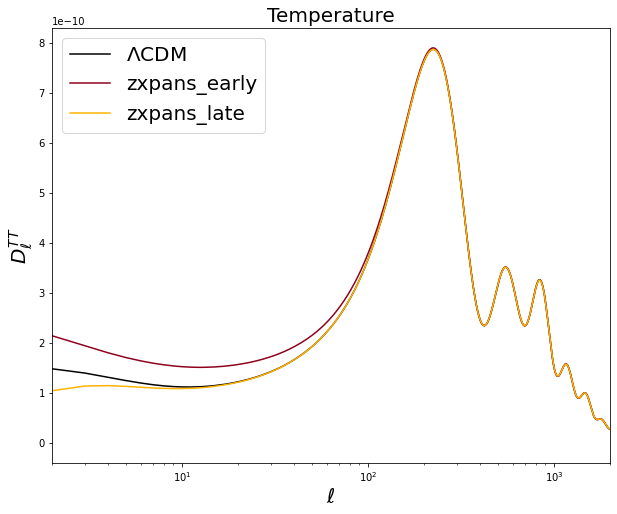

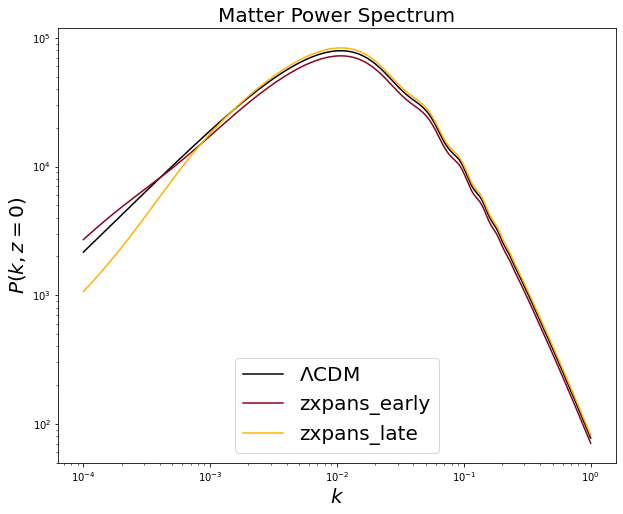

In [2]:
# z_xpans_early

params['mg_ansatz'] = 'z_xpans_early'
               
               
model_params = {'h' : 0.67556,'mg_T1': 0.3, 'mg_T2' : 0.1, 'mg_T3' : 0.3, 'mg_T4' : 0.1,'mg_zzn' : 1.0}

params.update(model_params)

cosmo = Class()
cosmo.set(params)
cosmo.compute()
cls = cosmo.lensed_cl(3000)
TT_zxpans_early   = cls["tt"]
lens_zxpans_early = cls["pp"]
ell_zxpans_early  = cls["ell"]
norm_zxpans_early = ell_zxpans_early*(ell_zxpans_early+1)/(2*np.pi)
mPk_zxpans_early  = [cosmo.pk(k,0.) for k in kappa]


#cleanup
cosmo.struct_cleanup()
cosmo.empty()
for key in model_params:
    if key in params:
        del params[key]
        
# z_xpans_late

params['mg_ansatz'] = 'z_xpans_late'
               
               
model_params = {'h' : 0.67556,'mg_T1': 0.3, 'mg_T2' : 0.1, 'mg_T3' : 0.3, 'mg_T4' : 0.1,'mg_zzn' : 1.0}

params.update(model_params)

cosmo = Class()
cosmo.set(params)
cosmo.compute()
cls = cosmo.lensed_cl(3000)
TT_zxpans_late   = cls["tt"]
lens_zxpans_late = cls["pp"]
ell_zxpans_late  = cls["ell"]
norm_zxpans_late = ell_zxpans_late*(ell_zxpans_late+1)/(2*np.pi)
mPk_zxpans_late  = [cosmo.pk(k,0.) for k in kappa]

#cleanup
cosmo.struct_cleanup()
cosmo.empty()
for key in model_params:
    if key in params:
        del params[key]
    

plt.figure(figsize=(10, 8))
plt.title('Temperature',fontsize=20)
plt.plot(ell_LCDM,TT_LCDM*norm_LCDM,label=r'$\Lambda$CDM',ls='-',color='black')
plt.plot(ell_zxpans_early,TT_zxpans_early*norm_zxpans_early,label='zxpans_early',ls='-',color='#8E001C')
plt.plot(ell_zxpans_late,TT_zxpans_late*norm_zxpans_late,label='zxpans_late',ls='-',color='#FFB300')
plt.xlabel(r'$\ell$',fontsize=20)
plt.ylabel(r'$D_{\ell}^{TT}$',fontsize=20)
plt.xlim(2.0,2000)
plt.xscale('log')
plt.legend(loc="upper left",fontsize=20)
plt.show()

plt.figure(figsize=(10, 8))
plt.title('Matter Power Spectrum',fontsize=20)
plt.plot(kappa,mPk_LCDM,label=r'$\Lambda$CDM',ls='-',color='black')
plt.plot(kappa,mPk_zxpans_early,label='zxpans_early',ls='-',color='#8E001C')
plt.plot(kappa,mPk_zxpans_late,label='zxpans_late',ls='-',color='#FFB300')
plt.xlabel(r'$k$',fontsize=20)
plt.ylabel(r'$P(k,z=0)$',fontsize=20)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc="lower center",fontsize=20)
plt.show()

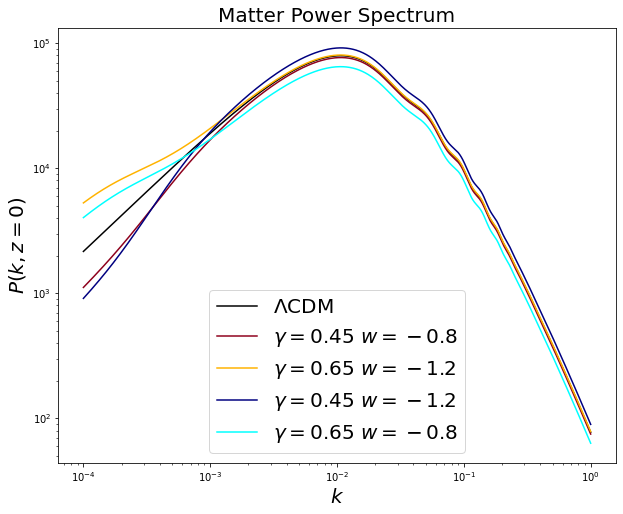

In [7]:
# Growth Index with W

params['mg_ansatz'] = 'GI'

GI    = [0.45,0.65,0.45,0.65]
W     = [-0.8,-1.2,-1.2,-0.8]
labels = [r'$\gamma=0.45$ $w=-0.8$',r'$\gamma=0.65$ $w=-1.2$',
          r'$\gamma=0.45$ $w=-1.2$',r'$\gamma=0.65$ $w=-0.8$']
colors = ['#8E001C','#FFB300','navy','cyan']

params['Omega_Lambda']= 0.0

mPk_GI = []

for par1,par2 in zip(GI,W):
    params['gamGI'] = par1
    params['w0_fld'] = par2
    
    cosmo = Class()
    cosmo.set(params)
    cosmo.compute()

    mpk = [cosmo.pk(k,0.) for k in kappa]
    mPk_GI.append(mpk)
    

    params.pop('gamGI')
    params.pop('w0_fld')
    cosmo.struct_cleanup()
    cosmo.empty()
    
plt.figure(figsize=(10, 8))
plt.title('Matter Power Spectrum',fontsize=20)
plt.plot(kappa,mPk_LCDM,label=r'$\Lambda$CDM',ls='-',color='black')
for ind in range(len(GI)):
    plt.plot(kappa,mPk_GI[ind],label=labels[ind],ls='-',color=colors[ind])
plt.xlabel(r'$k$',fontsize=20)
plt.ylabel(r'$P(k,z=0)$',fontsize=20)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc="lower center",fontsize=20)
plt.show()

In [ ]:
import IPython.display as ipd
sound_file = 'https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav'

ipd.display(ipd.Audio(url=sound_file, rate=20000, autoplay=True))